<center>
<h1>Fake news detection using graph neural network</h1>
<h2>Graph Attention Network (GAT) GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import GATConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class GAT(torch.nn.Module):
    
    def __init__(self, num_n_feature, num_g_feature, emb_size):
        super(GAT, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.in_gat1_layer = GATConv(num_n_feature, emb_size)
        self.gat2 = GATConv(emb_size, emb_size)

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)

    def forward(self, x, edges_idx, batch_idx, g_features):

        x = self.in_gat1_layer(x, edges_idx)

        x = self.gat2(x, edges_idx)

        flatten = torch.cat([global_mean_pool(x, batch_idx),
                             global_max_pool(x, batch_idx)], axis=1)
        
        if g_features.size()[-1] > 1:
            g_ft = self.lin_g(g_features)
            flatten = torch.cat([flatten, g_ft], axis=1)

        out = self.act(self.out_layer(flatten))

        return out

# Training

In [4]:
models = train_all_and_optimize(GAT, datasets, epochs = 60)

[I 2022-01-05 22:05:57,792] A new study created in memory with name: no-name-cf9ce53e-9c22-4e1b-b6f5-5c7ccfd8cd65


--> Train on: origin


[I 2022-01-05 22:06:51,910] Trial 0 finished with value: 0.9100030637254902 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.9100030637254902.
[I 2022-01-05 22:07:17,951] Trial 1 finished with value: 0.9520909926470589 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 1 with value: 0.9520909926470589.
[I 2022-01-05 22:07:38,615] Trial 2 finished with value: 0.8522518382352942 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 100}. Best is trial 1 with value: 0.9520909926470589.
[I 2022-01-05 22:07:53,514] Trial 3 finished with value: 0.9093903186274509 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 1 with value: 0.9520909926470589.
[I 2022-01-05 22:08:16,990] Trial 4 finished with value: 0.9

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.3892472485701243  loss_val=0.3237529844045639 | acc_train=0.8281632965686274  acc_val=0.8640280330882353
Epochs: 20 | loss_train=0.3211168944835663  loss_val=0.22706830501556396 | acc_train=0.8617493872549019  acc_val=0.9061351102941176
Epochs: 30 | loss_train=0.28094482421875  loss_val=0.2575356885790825 | acc_train=0.8787147671568628  acc_val=0.8864889705882353
Epochs: 40 | loss_train=0.20237437387307486  loss_val=0.22601859271526337 | acc_train=0.9289215686274509  acc_val=0.9187729779411764
Epochs: 50 | loss_train=0.18904843926429749  loss_val=0.13489558547735214 | acc_train=0.9308746936274509  acc_val=0.9619140625
Epochs: 60 | loss_train=0.1808074712753296  loss_val=0.1312083676457405 | acc_train=0.9151731004901961  acc_val=0.9520909926470589


[I 2022-01-05 22:09:52,443] A new study created in memory with name: no-name-6b0b3e53-8813-4e0c-9ecd-94deb794f22a


--> Train on: dataset1


[I 2022-01-05 22:10:09,625] Trial 0 finished with value: 0.8670955882352942 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8670955882352942.
[I 2022-01-05 22:10:38,640] Trial 1 finished with value: 0.8584558823529411 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.8670955882352942.
[I 2022-01-05 22:11:05,534] Trial 2 finished with value: 0.8807444852941176 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 2 with value: 0.8807444852941176.
[I 2022-01-05 22:11:32,091] Trial 3 finished with value: 0.8624387254901961 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 2 with value: 0.8807444852941176.
[I 2022-01-05 22:11:55,591] Trial 4 finished with value: 0.6

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.3842753503057692  loss_val=0.34270628094673156 | acc_train=0.8584558823529412  acc_val=0.8639705882352942
Epochs: 20 | loss_train=0.40298955804771847  loss_val=0.49578286409378053 | acc_train=0.8764808006535948  acc_val=0.8556985294117647
Epochs: 30 | loss_train=0.24998160203297934  loss_val=0.28449366986751556 | acc_train=0.9009906045751634  acc_val=0.8658088235294118
Epochs: 40 | loss_train=0.3051775288250711  loss_val=0.25244222581386566 | acc_train=0.8931781045751634  acc_val=0.9108455882352942
Epochs: 50 | loss_train=0.19838958316379124  loss_val=0.21004176139831543 | acc_train=0.9196282679738563  acc_val=0.9233455882352942
Epochs: 60 | loss_train=0.17170137249761158  loss_val=0.20047624111175538 | acc_train=0.9370404411764706  acc_val=0.9198529411764707


[I 2022-01-05 22:14:40,529] A new study created in memory with name: no-name-71e8de42-77e0-44d9-ae3d-1b8cb36dd4ab


--> Train on: dataset2


[I 2022-01-05 22:14:56,445] Trial 0 finished with value: 0.8571346507352942 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8571346507352942.
[I 2022-01-05 22:15:19,812] Trial 1 finished with value: 0.8767807904411764 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.8767807904411764.
[I 2022-01-05 22:15:45,615] Trial 2 finished with value: 0.8170381433823529 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 1 with value: 0.8767807904411764.
[I 2022-01-05 22:16:03,696] Trial 3 finished with value: 0.8375459558823529 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 1 with value: 0.8767807904411764.
[I 2022-01-05 22:16:21,308] Trial 4 finished with value: 0.

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.5153438183996413  loss_val=0.37744792103767394 | acc_train=0.7849775326797386  acc_val=0.8350183823529411
Epochs: 20 | loss_train=0.3176068067550659  loss_val=0.31536378860473635 | acc_train=0.8758169934640523  acc_val=0.8717830882352942
Epochs: 30 | loss_train=0.4432152774598863  loss_val=0.45544096231460574 | acc_train=0.8428308823529412  acc_val=0.8627757352941176
Epochs: 40 | loss_train=0.27864320907327866  loss_val=0.2539797008037567 | acc_train=0.8853656045751634  acc_val=0.8976102941176471
Epochs: 50 | loss_train=0.2762930856810676  loss_val=0.29166688919067385 | acc_train=0.8893995098039215  acc_val=0.8792279411764706
Epochs: 60 | loss_train=0.23365717464023167  loss_val=0.23412007391452788 | acc_train=0.9049223856209151  acc_val=0.8976102941176471


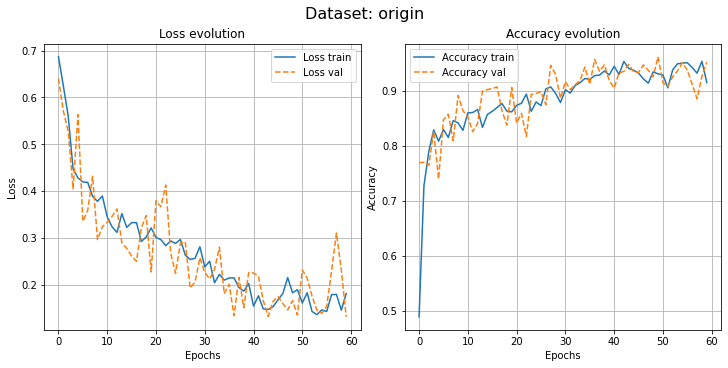

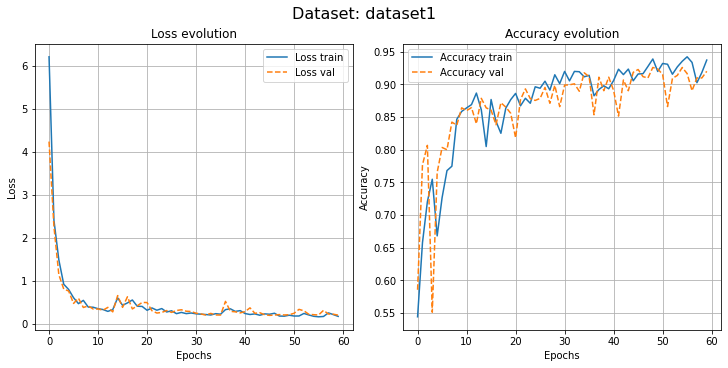

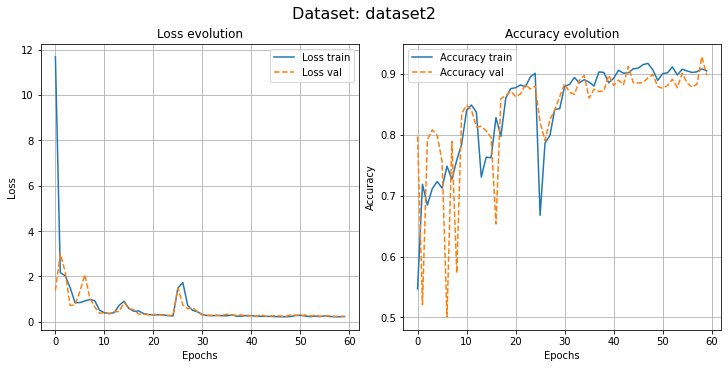

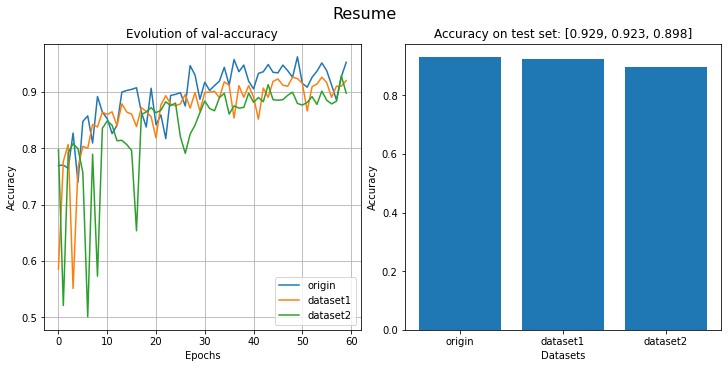

In [5]:
plot_hist(models)

# Save the three models

In [6]:
path = '../models/GAT/'
for name, model, _, _ in models:
    torch.save(model, f'{path}GAT_{name}')